## The Mercator Projection

We explore a projection of the sphere onto a plane used in map making.

Here is a quick interactive visualization tool.

In [3]:
# quick mercator world
import plotly.express as px
import pandas as pd

country_data = px.data.gapminder()
map_fig = px.scatter_geo(country_data,  projection = 'mercator')
map_fig.show()

\begin{myfig}\label{fig:mercplotly} Interactive visualization of Mercator Projection. \end{myfig}

This is done by central projection onto a cylinder and then unrolling the cylinder.

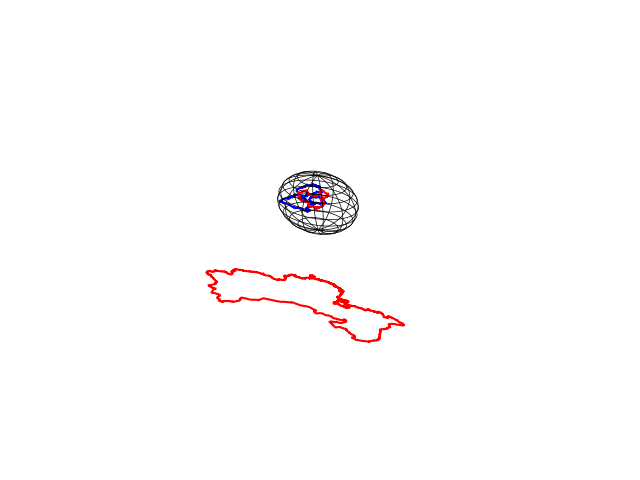

In [2]:
# read a level-0 json country file from https://gadm.org/download_country.html
# and plot it on the sphere and its stereographic projection

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import geopandas
    
fig = plt.figure(' ') #,figsize=(6,6))
ax = plt.axes(projection="3d")    # set up for 3D work

def Splot(c, col):      # plot country c on the unit sphere
    cvals = c.values
    MultiP = cvals[0][2]   # multipolygon
    polys = list(MultiP.geoms)  # list of polys

    for poly in polys:
        ring = poly.exterior  # linear ring
        verts = list(ring.coords) # vertices!
        vlen = 0   # len(verts) work around
        for v in verts:
            vlen += 1
            
        if (vlen > 200):  # just plot the big stuff
            npv = np.array(verts)
            long = npv[:,0]
            lat = npv[:,1]
            phi = -(np.pi/180.0)*(180-long)
            theta = (np.pi/180.0)*(90 - lat)
            u = (1/2)*np.sin(theta)*np.cos(phi)
            v = (1/2)*np.sin(theta)*np.sin(phi)
            w = (1/2)*np.cos(theta)
            ax.plot(u, v, w, col)
            x = u/(1/2-w)
            y = v/(1/2-w)
            z = -(1/2)*np.ones(x.size)
            ax.plot(x, y, z, col)
            
c = geopandas.read_file('../Images/gadm41_BRA_0.json')  # level 0 Geojson country data 
Splot(c,'b')

c = geopandas.read_file('../Images/gadm41_CHN_0.json')
Splot(c,'r')
    
# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = (1/2)*np.sin(theta)*np.cos(phi)
    v = (1/2)*np.sin(theta)*np.sin(phi)
    w = (1/2)*np.cos(theta)
    ax.plot(u, v, w,  'k', linewidth=0.5)

# plot lines of longitude
theta = np.linspace(0, np.pi, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = (1/2)*np.sin(theta)*np.cos(phi)
    v = (1/2)*np.sin(theta)*np.sin(phi)
    w = (1/2)*np.cos(theta)
    ax.plot(u, v, w, 'k', linewidth=0.5)

#ax.set_xlim([-2,2])
#ax.set_ylim([-2,2])
ax.set_box_aspect((4, 4, 1))
ax.axis('off'); 

The (lat, long) pair on the sphere are specified by angles (in radians) $(\phi, \la)$ and we note that the circumference of a circle of latitude $\phi$ is $2\pi R\cos(\phi)$. As such, in order to arrive at a square grid we must scale (stretch) by $\sec(\phi)=1/\cos(\phi)$ in both directions.

We arrive at equations for $x$ and $y$ by considering how circles of latitude and longitude stretch under small changes.
In particular, if we move $\la$ by $d\la$ then we trace out an arc of length $R\cos(\phi)d\la$ on the sphere. When we scale by $\sec(\phi)$ we find

\begin{equation}\label{eq:xla}
  \frac{dx}{d\la} = R\cos(\phi)\sec(\phi) = R
\end{equation}

And, as $x(0)=0$ it follows that $x(\la) = R\la$.
Similarly,  if we move $\phi$ by $d\phi$ then we trace out an arc of length $Rd\phi$ on the sphere. 
When we scale by $\sec(\phi)$ we find

\begin{equation}\label{eq:yphi}
  \frac{dy}{d\phi} = R\sec(\phi)
\end{equation}

where $y(0)=0$ as well.

\begin{exercise}\label{ex:logtan}
Please confirm that

\begin{equation}\label{eq:yexact}
  y(\phi) = R\log(\tan(\pi/4+\phi/2))
\end{equation}

indeed does the job. 
\end{exercise}

We put this to use below...



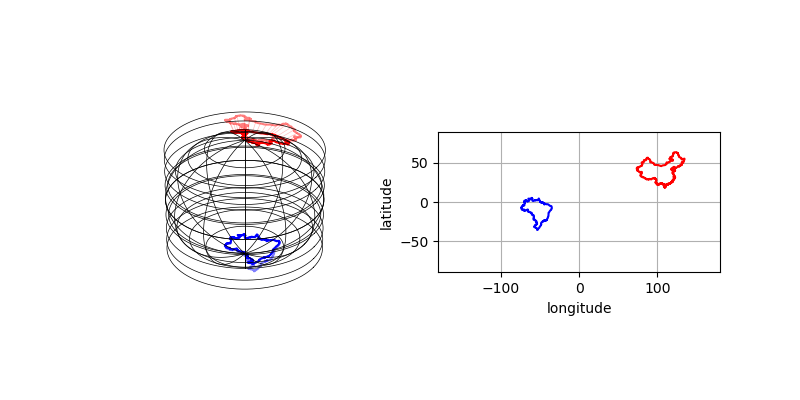

In [5]:
# read a level-0 json country file from https://gadm.org/download_country.html
# and plot it on the sphere and its mercator projection

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import geopandas

fig = plt.figure(' ', figsize=(8,4))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

def Splot(c, col):      # plot country c on the unit sphere
    cvals = c.values
    MultiP = cvals[0][2]   # multipolygon
    polys = list(MultiP.geoms)  # list of polys

    for poly in polys:
        ring = poly.exterior  # linear ring
        verts = list(ring.coords) # vertices!
        vlen = 0   # len(verts) work around
        for v in verts:
            vlen += 1
            
        if (vlen > 200):  # just plot the big stuff
            npv = np.array(verts)
            long = npv[:,0]
            lat = npv[:,1]
            phi = (np.pi/180.0)*(long)
            theta = (np.pi/180.0)*(lat)
            u = (1/2)*np.cos(theta)*np.cos(phi)
            v = (1/2)*np.cos(theta)*np.sin(phi)
            w = (1/2)*np.sin(theta)
            ax1.plot(u, v, w, col)    # on sphere
            u1 = (1/2)*np.cos(phi)
            v1 = (1/2)*np.sin(phi)
            ax1.plot(u1, v1, w,  col, alpha = 0.5)  # on cylinder
            x = phi*180/np.pi
            y = np.log(np.tan(theta/2 + np.pi/4))*180/np.pi
            ax2.plot(x, y, col)  # on plane
            
            p = np.array([u[0], v[0], w[0]])   # now show equally spaced connection line from sphere to cylinder
            for i in range(1,vlen):
                q = np.array([u[i], v[i], w[i]])
                if np.linalg.norm(p - q) > 0.03:
                    ax1.plot([u[i],u1[i]],[v[i], v1[i]], [w[i],w[i]],  col, linewidth=0.5, alpha = 0.25)  # to cylinder 
                    p = q
                        
c = geopandas.read_file('../Images/gadm41_BRA_0.json')  # level 0 Geojson country data 
Splot(c,'b')

c = geopandas.read_file('../Images/gadm41_CHN_0.json')
Splot(c,'r')
    
# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(lat)*np.ones(phi.size)
    u = (1/2)*np.cos(theta)*np.cos(phi)
    v = (1/2)*np.cos(theta)*np.sin(phi)
    w = (1/2)*np.sin(theta)
    ax1.plot(u, v, w,  'k', linewidth=0.5)  # on sphere
    ax1.plot((1/2)*np.cos(phi), (1/2)*np.sin(phi), w,  'k', linewidth=0.5)  # on cylinder
       
# plot lines of longitude
theta = np.linspace(-np.pi/2, np.pi/2, 100)
for long in range(-180,180,30):
    phi = (np.pi/180.0)*(long)*np.ones(theta.size)
    u = (1/2)*np.cos(theta)*np.cos(phi)
    v = (1/2)*np.cos(theta)*np.sin(phi)
    w = (1/2)*np.sin(theta)
    ax1.plot(u, v, w, 'k', linewidth=0.5)

ax2.axis('scaled')
ax2.axis([-180,180,-90,90])
ax2.grid('on')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')
ax1.axis('off'); 

\begin{myfig}\label{fig:merc} Mercator Projection of (red) China and (blue) Brazil. \end{myfig}

\begin{exercise}\label{ex:2more}
Add at least two more countries of your choice to this map.
\end{exercise}

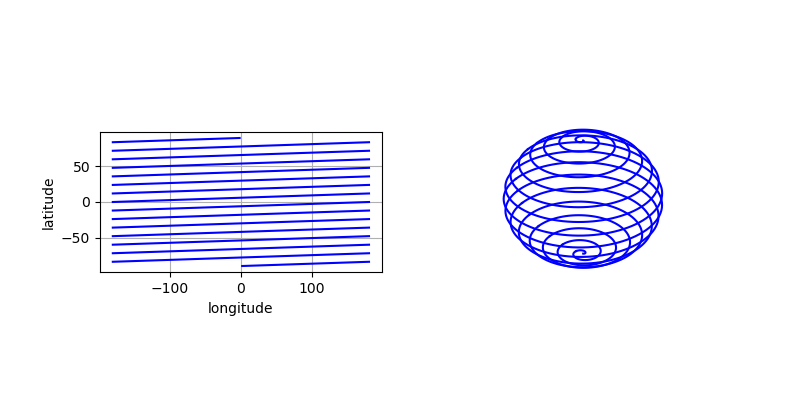

In [3]:
# rhumb or loxodrome

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
    
fig = plt.figure(' ', figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

N = 100
phi = np.linspace(-np.pi, np.pi, N)    # longitude
m = 1/30
b = -np.pi/2
lam = m*phi + b                       # latitude
for n in range(N):
    if lam[n] < -np.pi/2:
        lam[n] = np.nan

go = True  # go until we reach the top
while go:
    z = np.sin(lam)
    ax1.plot(phi*180/np.pi, lam*180/np.pi, 'b')
    ax2.plot(np.cos(phi)*np.cos(lam), np.sin(phi)*np.cos(lam), z, 'b')  # on sphere
    b = b + 2*m*np.pi
    lam = m*phi + b
    for n in range(N):
        if lam[n] > np.pi/2:
            lam[n] = np.nan
            go = False

ax1.plot(phi*180/np.pi, lam*180/np.pi, 'b')
ax1.axis('scaled')
ax1.grid('on')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
ax2.plot(np.cos(phi)*np.cos(lam), np.sin(phi)*np.cos(lam), np.sin(lam), 'b')   # final leg, on sphere
ax2.axis('off'); 

\begin{myfig}\label{fig:loxo} Sailing along a straight line on the Mercator Map (left) is equivalent to sailing a loxodrome, or rhumb line, on the sphere (right). The latter image may be rotated (left mouse button) and zoomed (right mouse button).
\end{myfig}